# Exploratory Data Analysis IMDb

Everybody who knows me know I like movies as much programming. Then, I've been decided made this notebook with the purpose of practicing my programming skills on R language, actually I've still studying it. And, to show some insights about movies, for example, do you know about the nerd supremacy in cinema? Nerdy movies have always dominated the cinema and I can proof.

I choose a IMDb dataset and selected some questions I wanted to answer. Follow below:

- How much is the volume of movies over the years?
- Which are the countries most predominant in cinema over the years?
- Which are the genres most predominant in cinema over the years?
- Which are the highest box offices in the last years? And which are your genres?
- There is some correlation in highest box office with IMDb score?
- The more awards the film has, the higher it's box office?
- Which are the genres with most awards over the years?

Obs.: When I was doing my analysis, I realized the counting of the movies per country had a issue, it's just counted the movies made in a single country. So, that analysis in this case could be an estimation.

In [1]:
#Librarys
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggrepel))

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [2]:
#Adjusting the size of plot
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100)

#Disabling warning messages
options(warn=-1)

In [3]:
#Reading data
imdb_movies <- read_csv('IMDb_movies.csv', col_types = cols()) %>%
                    select(-actors, -description) #Selecting all the columns except actors and description
head(imdb_movies)

imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NA,Charles Tait,Charles Tait,J. and N. Tait,6.1,537,$ 2250,NA,NA,NA,7,7
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NA,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,5.9,171,NA,NA,NA,NA,4,2
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,420,$ 45000,NA,NA,NA,24,3
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,7.0,2019,NA,NA,NA,NA,28,14
tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,5.7,438,NA,NA,NA,NA,12,5
tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),6.8,709,NA,NA,NA,NA,11,9


In [4]:
#Dataframe Struture
str(imdb_movies)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	81273 obs. of  20 variables:
 $ imdb_title_id        : chr  "tt0000574" "tt0001892" "tt0002101" "tt0002130" ...
 $ title                : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ original_title       : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ year                 : num  1906 1911 1912 1911 1912 ...
 $ date_published       : chr  "1906-12-26" "1911-08-19" "1912-11-13" "1911-03-06" ...
 $ genre                : chr  "Biography, Crime, Drama" "Drama" "Drama, History" "Adventure, Drama, Fantasy" ...
 $ duration             : num  70 53 100 68 60 85 120 120 55 121 ...
 $ country              : chr  "Australia" "Germany, Denmark" "USA" "Italy" ...
 $ language             : chr  NA NA "English" "Italian" ...
 $ director             : chr  "Charles Tait" "Urban Gad" "Charles L. Gaskill" "Francesco Bertolini, Adolfo Padovan" ...
 $ writer               : c

In [5]:
#Columns names
print(names(imdb_movies))

 [1] "imdb_title_id"         "title"                 "original_title"       
 [4] "year"                  "date_published"        "genre"                
 [7] "duration"              "country"               "language"             
[10] "director"              "writer"                "production_company"   
[13] "avg_vote"              "votes"                 "budget"               
[16] "usa_gross_income"      "worlwide_gross_income" "metascore"            
[19] "reviews_from_users"    "reviews_from_critics" 


In [6]:
#Reading data
oscar_award <- read_csv('the_oscar_award.csv', col_types=cols())

head(oscar_award)

year_film,year_ceremony,ceremony,category,name,film,winner
1927,1928,1,ACTOR,Richard Barthelmess,The Noose,FALSE
1927,1928,1,ACTOR,Emil Jannings,The Last Command,TRUE
1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,FALSE
1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,TRUE
1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,FALSE
1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,FALSE


In [7]:
#Dataframe Struture
str(oscar_award)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	10395 obs. of  7 variables:
 $ year_film    : num  1927 1927 1927 1927 1927 ...
 $ year_ceremony: num  1928 1928 1928 1928 1928 ...
 $ ceremony     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ category     : chr  "ACTOR" "ACTOR" "ACTRESS" "ACTRESS" ...
 $ name         : chr  "Richard Barthelmess" "Emil Jannings" "Louise Dresser" "Janet Gaynor" ...
 $ film         : chr  "The Noose" "The Last Command" "A Ship Comes In" "7th Heaven" ...
 $ winner       : logi  FALSE TRUE FALSE TRUE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   year_film = col_double(),
  ..   year_ceremony = col_double(),
  ..   ceremony = col_double(),
  ..   category = col_character(),
  ..   name = col_character(),
  ..   film = col_character(),
  ..   winner = col_logical()
  .. )


### The function below is used to modify the graph's theme

In [8]:
#Personalized theme to columns
theme_perso_col <- function(name){
    #In case the name is null
    if(missing(name)){
        theme_light() +
        theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')
    }else if(name=='angle90'){
        theme_light() +
        theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))
    }
}

# Distribution of movies per year

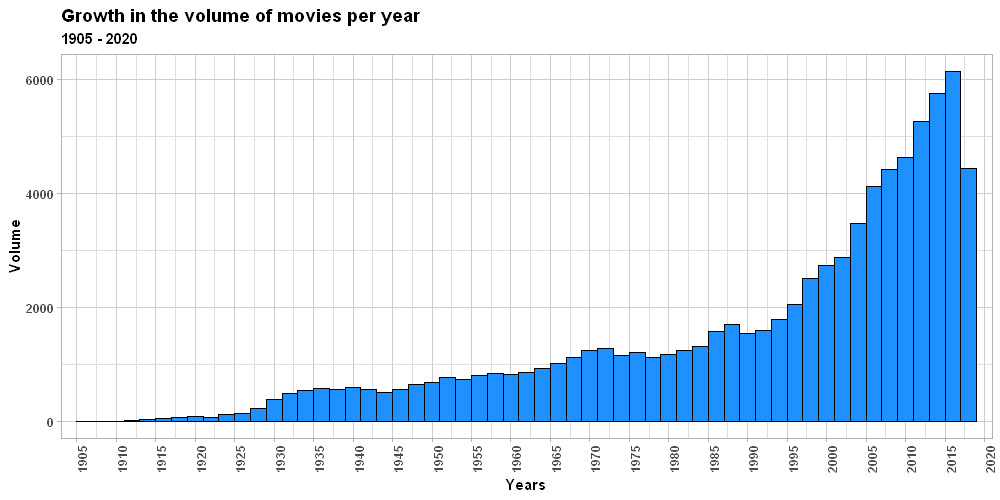

In [9]:
imdb_movies %>% 
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        scale_x_continuous(breaks = seq(1905, 2020, 5), expand = c(0,2)) +
        labs(title = "Growth in the volume of movies per year",
             subtitle = '1905 - 2020',
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

# Predominants countries in cinema in the 1905s - 1950s

In [10]:
#Function to plotting
country_movie <- function(start, end, top){
    imdb_movies %>%
        filter(year %in% c(start, end)) %>%
        group_by(country) %>%
        count() %>%
        arrange(-n) %>%
        head(top) %>%
        ggplot(aes(x = reorder(country, -n), y = n, fill = country)) +
            geom_bar(stat = 'identity') +
            scale_fill_viridis_d() +
            labs(title = 'Quantity of the movies per country',
                subtitle =  paste0(start, ' - ', end) ,
                y = 'Quantity', x = 'Countries', fill = 'Countries') +
            theme_perso_col('angle90')
}

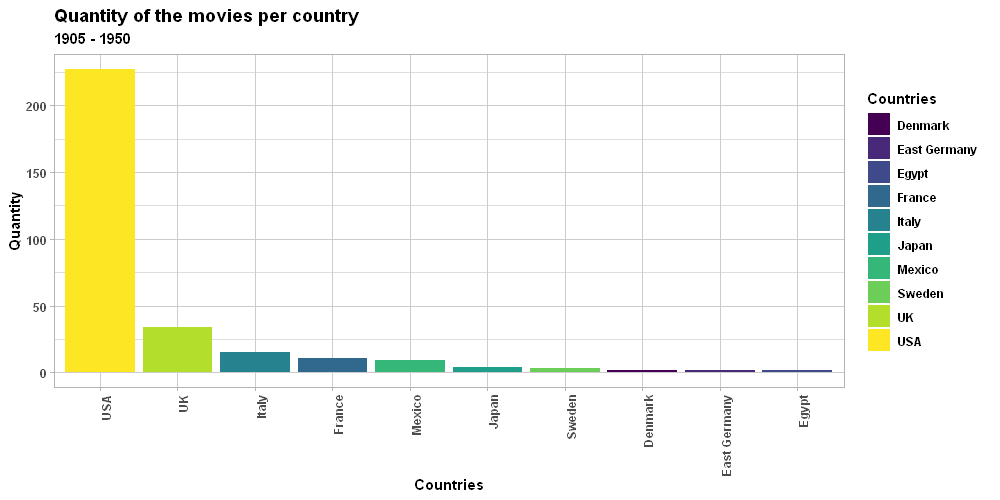

In [11]:
country_movie(1905,1950,10)

# Predominants countries in cinema in the 1951s - 2020s

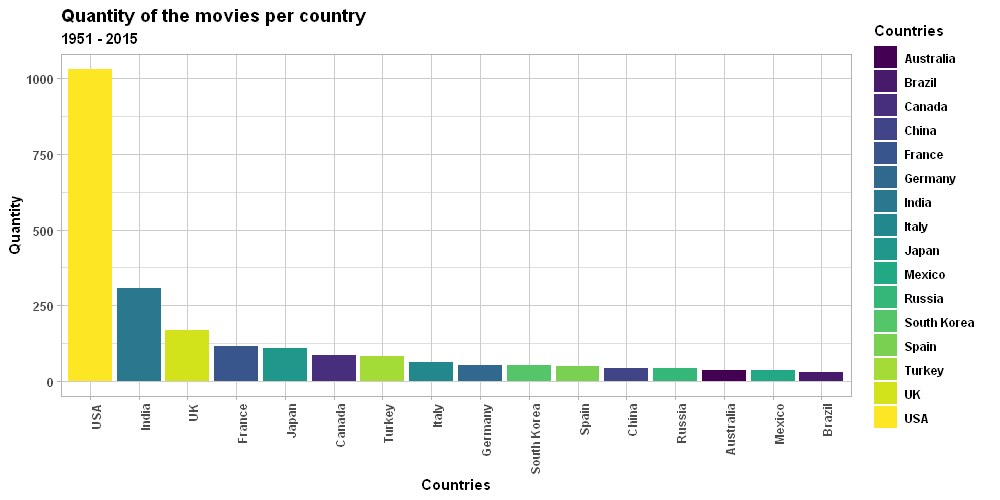

In [12]:
country_movie(1951,2015,16)

# Genres

In [13]:
#Genre with most movies in the cinema history
genres <- imdb_movies %>%
            select(genre) %>%
            group_by(genre) %>%
            count() %>%
            filter(n > 500) %>%
            arrange(-n)
genres

genre,n
Drama,11809
Comedy,7322
"Comedy, Drama",3822
"Drama, Romance",3252
"Comedy, Romance",2383
Horror,2189
"Comedy, Drama, Romance",2172
"Crime, Drama",1277
"Drama, Thriller",1270
"Action, Crime, Drama",1241


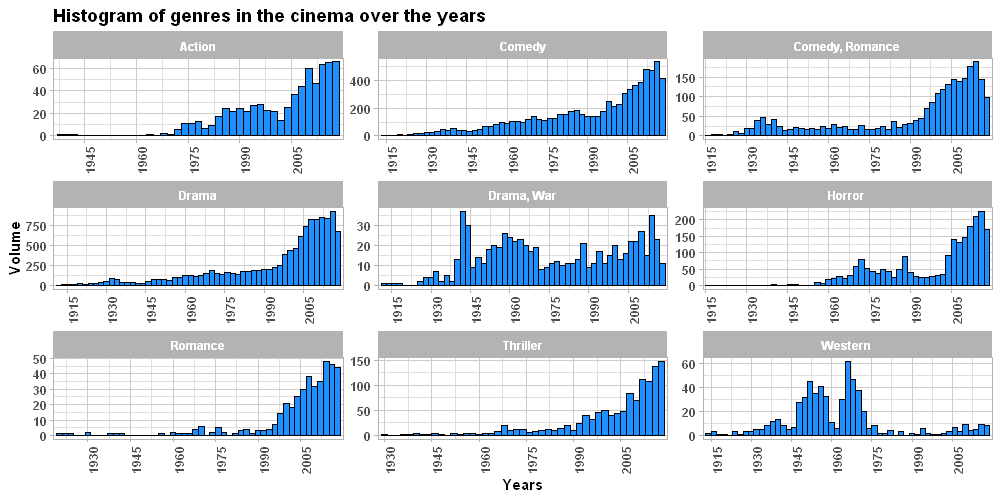

In [14]:
principal_genres <- c('Drama', 'Comedy', 'Horror', 'Action', 
                      'Western', 'Thriller', 'Drama, War', 'Romance', 'Comedy, Romance')

imdb_movies %>% 
        filter(genre %in% principal_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histogram of genres in the cinema over the years",
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

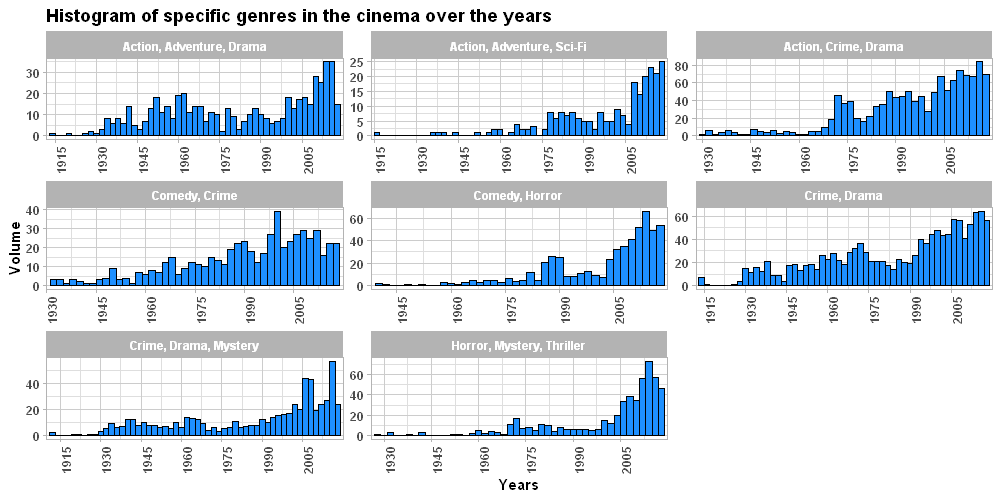

In [15]:
others_genres <- c('Crime, Drama, Mystery', 'Crime, Drama', 'Action, Crime, Drama', 
                   'Action, Adventure, Drama', 'Horror, Mystery, Thriller', 'Comedy, Horror', 'Comedy, Crime',
                  'Action, Adventure, Sci-Fi')

imdb_movies %>% 
        filter(genre %in% others_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histogram of specific genres in the cinema over the years",
            x = "Years", y = "Volume") +
        theme_perso_col('angle90')

# Analysis of the biggest box office of the last decades

In [16]:
#Dataframe without missing values
imdb_movies.omit <- na.omit(imdb_movies)

#Removing the symbol '$' from worlwide_gross_income column
worlwide_gross_income_new <- str_replace_all(imdb_movies.omit$worlwide_gross_income, fixed('$'), '')

#Converting worlwide_gross_income column to numeric
imdb_movies.omit$worlwide_gross_income <- as.numeric(worlwide_gross_income_new)

In [17]:
#Function to plotting
boxoffice_movies <- function(start, end, top){ #(year, year, top classification)
    imdb_movies.omit %>%
        filter(year %in% seq(start, end)) %>%
        select(title, worlwide_gross_income, genre) %>%
        arrange(-worlwide_gross_income) %>%
        head(top) %>%
        ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
        geom_bar(stat='identity') +
        scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Highest box offices over the year',
             subtitle = paste0(start, ' - ', end),
            x = 'Movies', y = 'Dollars (millions)',
            fill='Genre') +
        coord_flip() +
        theme_perso_col()
}

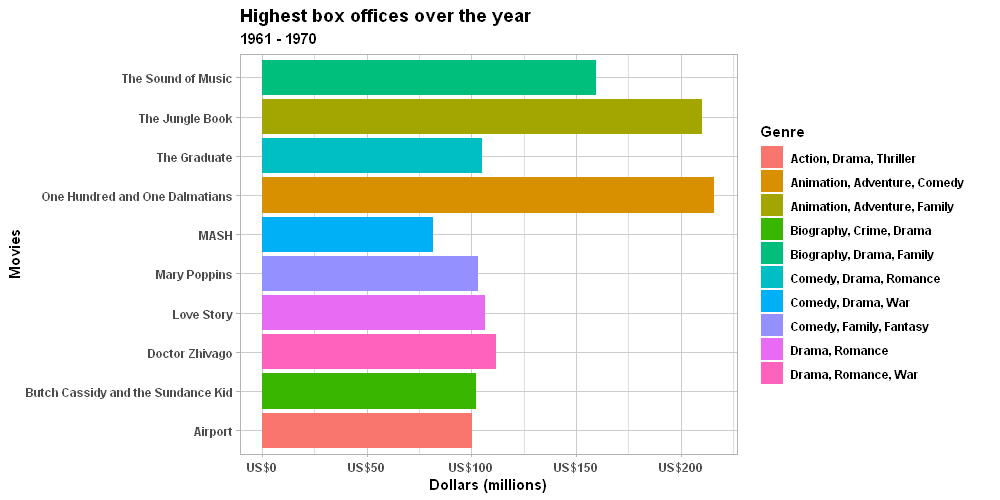

In [18]:
boxoffice_movies(1961,1970,10)

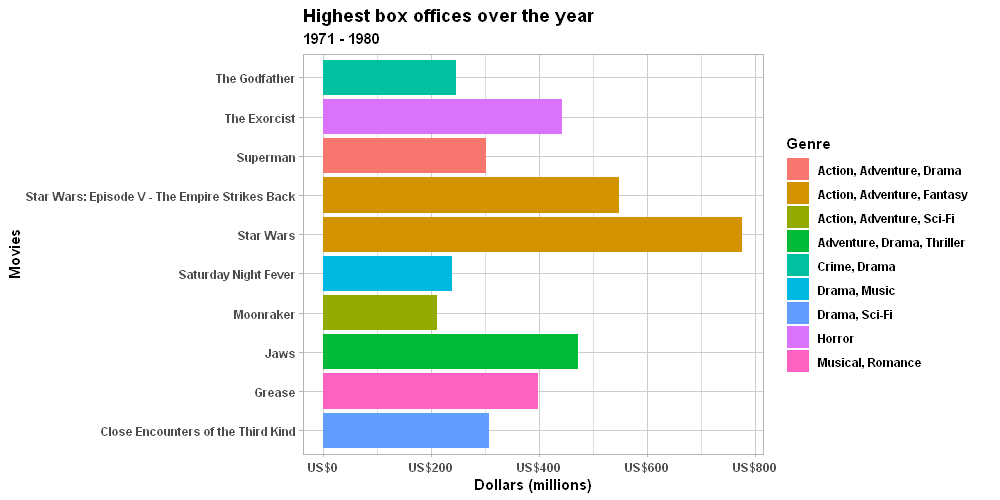

In [19]:
boxoffice_movies(1971,1980,10)

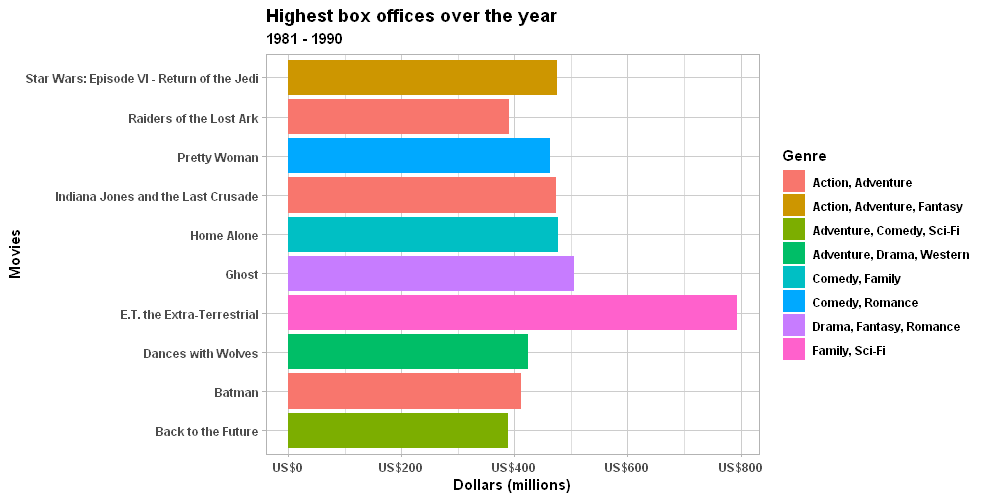

In [20]:
boxoffice_movies(1981,1990,10)

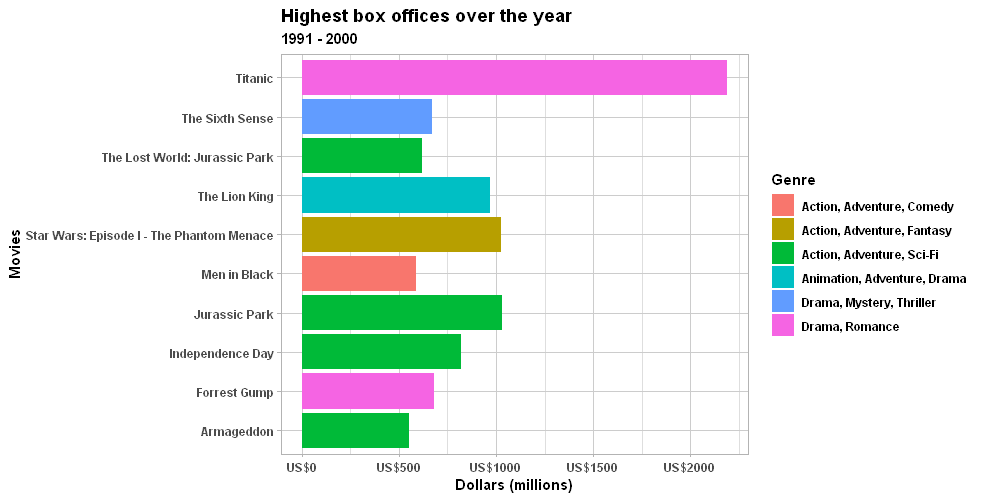

In [21]:
boxoffice_movies(1991,2000,10)

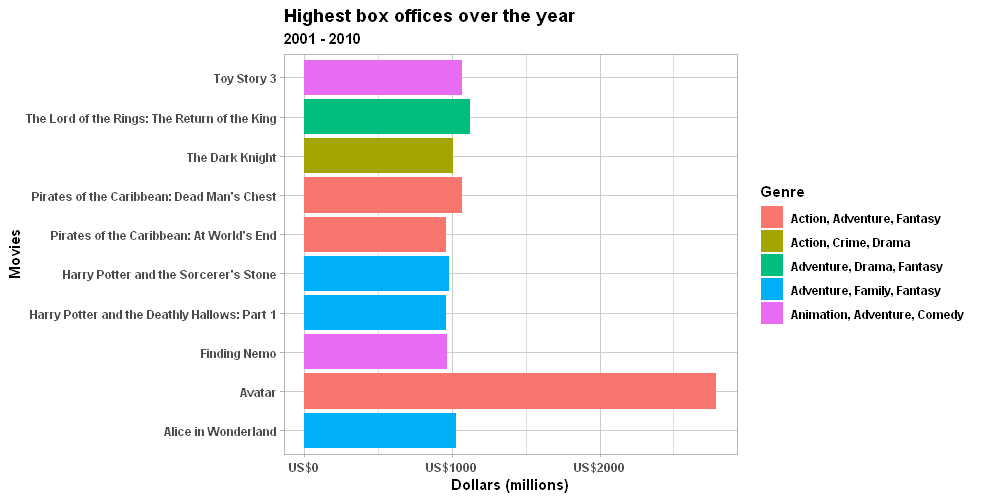

In [22]:
boxoffice_movies(2001,2010,10)

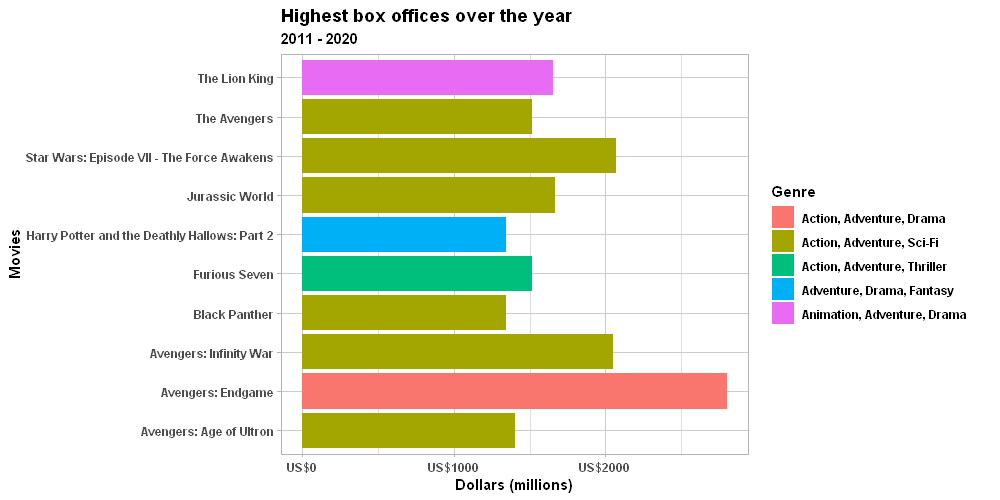

In [23]:
boxoffice_movies(2011,2020,10)

# Relationship between highest box offices with IMDb score 

In [24]:
#Function to plotting correlation
boxoffice_imdbscore <- function(start, end, top){ #(year, year, top classification)
    #Auxilliary Dataframe
    names <- imdb_movies.omit %>%
                    filter(year %in% seq(start, end)) %>%
                    select(title, worlwide_gross_income, avg_vote) %>%
                    top_n(top, wt = avg_vote)
    #Setting row names as title
    row.names(names) <- names$title
    #Creating the plotting
    imdb_movies.omit %>%
        filter(year %in% seq(start, end)) %>%
        select(title, worlwide_gross_income, avg_vote) %>%
        top_n(top, wt = avg_vote) %>%
        ggplot(aes(x = worlwide_gross_income, y = avg_vote, color = title)) +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(names)) +
        scale_x_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relationship between highest box offices with IMDb score',
             subtitle = paste0(start, ' - ', end),
            x = 'Dollars (millions)', y = 'iMDB Score',
            color='Movies') +
        coord_flip() +
        theme_perso_col()
}

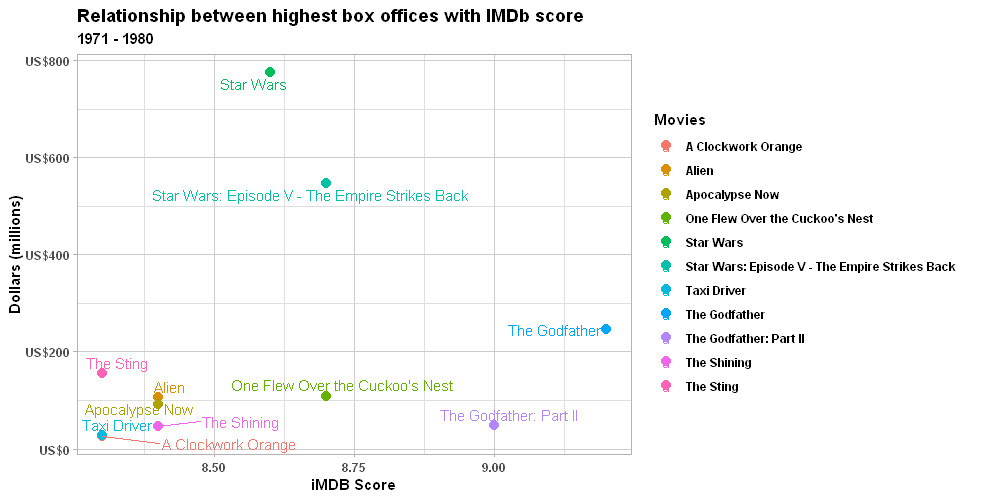

In [25]:
boxoffice_imdbscore(1971,1980,10)

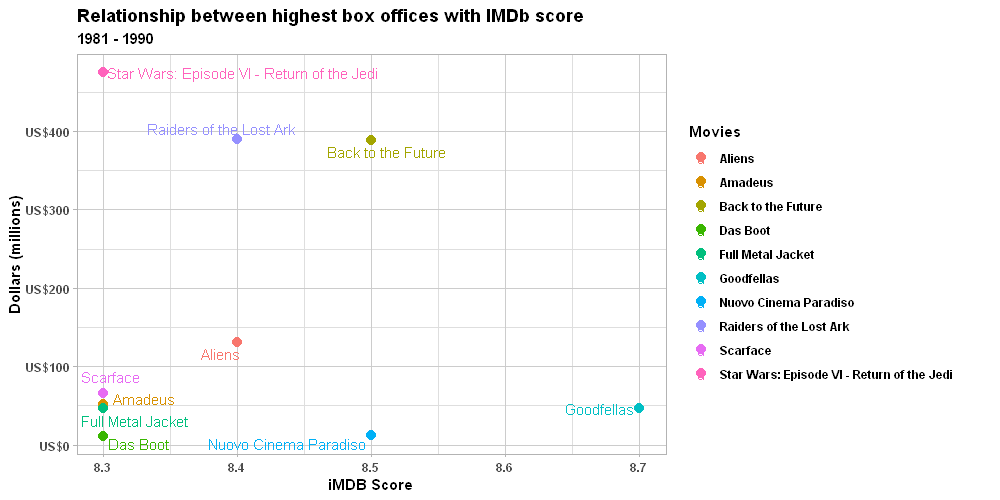

In [26]:
boxoffice_imdbscore(1981,1990,10)

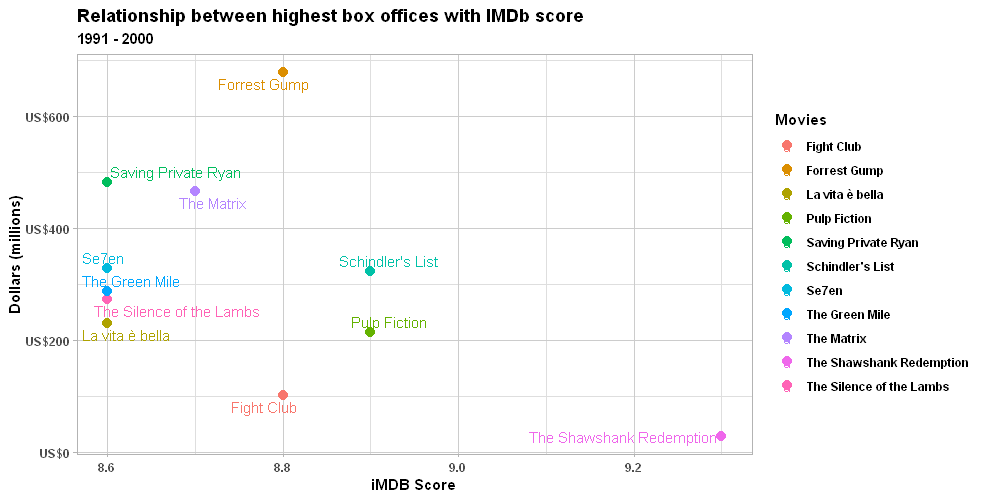

In [27]:
boxoffice_imdbscore(1991,2000,10)

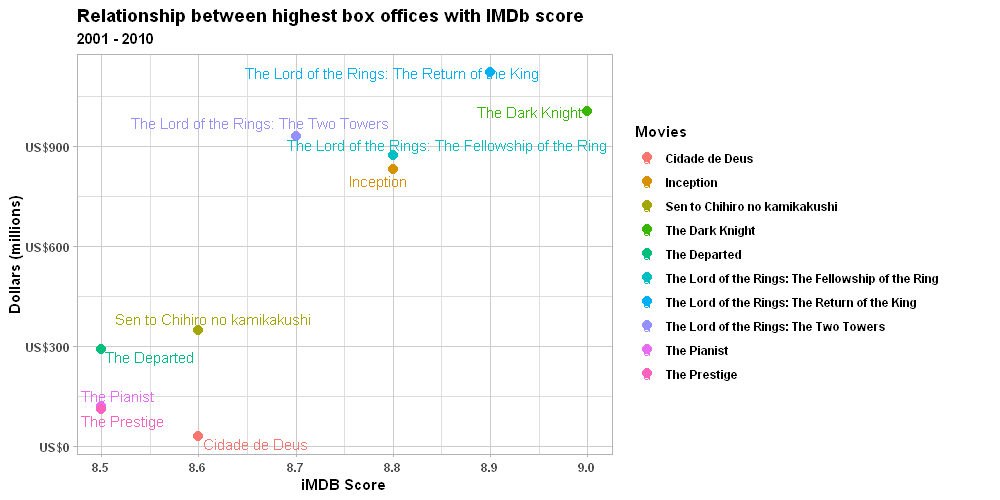

In [28]:
boxoffice_imdbscore(2001,2010,10)

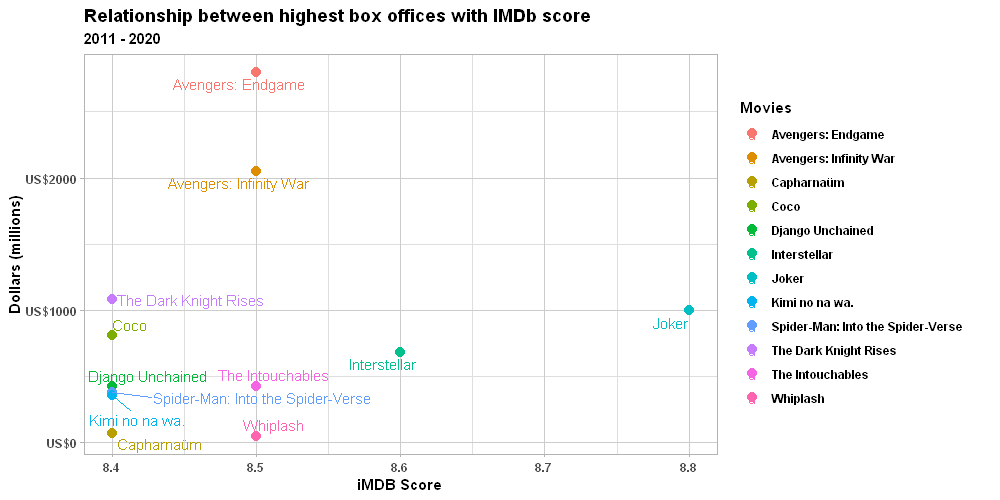

In [29]:
boxoffice_imdbscore(2011,2020,10)

# Relationship between box offices and awards

In [30]:
#Function to plotting correlation
boxoffice_oscar <- function(start, end, top){ #(year, year, top classification)
    #Auxilliary Dataframe
    names <- na.omit(oscar_award) %>%
                inner_join(imdb_movies.omit, by = c('film' = 'title')) %>%
                filter(year %in% seq(start, end) ) %>%
                group_by(film, worlwide_gross_income) %>%
                summarise('awards' = n()) %>%
                arrange(-awards) %>%
                head(top)
    #Setting row names as film
    row.names(names) <- names$film
    #Creating the plotting
    na.omit(oscar_award) %>%
        inner_join(imdb_movies.omit, by = c('film' = 'title')) %>%
        filter(year %in% seq(start, end) & winner == TRUE) %>%
        group_by(film, worlwide_gross_income) %>%
        summarise('awards' = n()) %>%
        arrange(-awards) %>%
        head(top) %>%
        ggplot(aes(x = awards, y = worlwide_gross_income, color = film)) +
        geom_point() +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(names)) +
        scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relationship between box offices and awards',
             subtitle = paste0(start, ' - ', end),
            x = 'Awards', y = 'Dollars (millions)',
            color='Movies') +
        theme_perso_col()
}

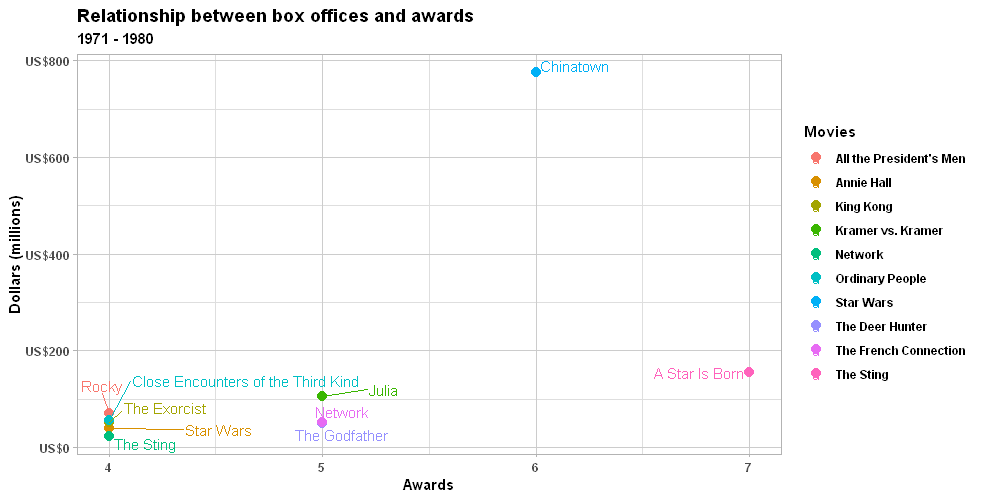

In [31]:
boxoffice_oscar(1971,1980,10)

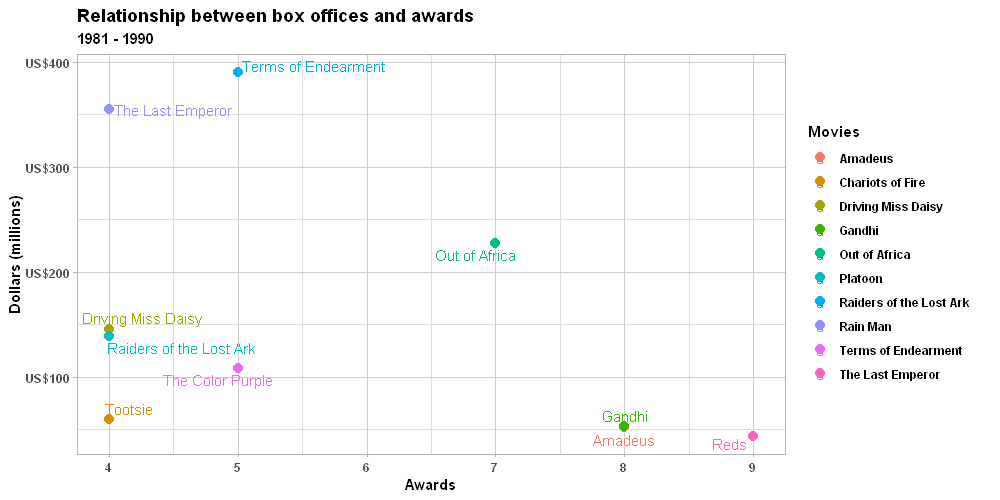

In [32]:
boxoffice_oscar(1981,1990,10)

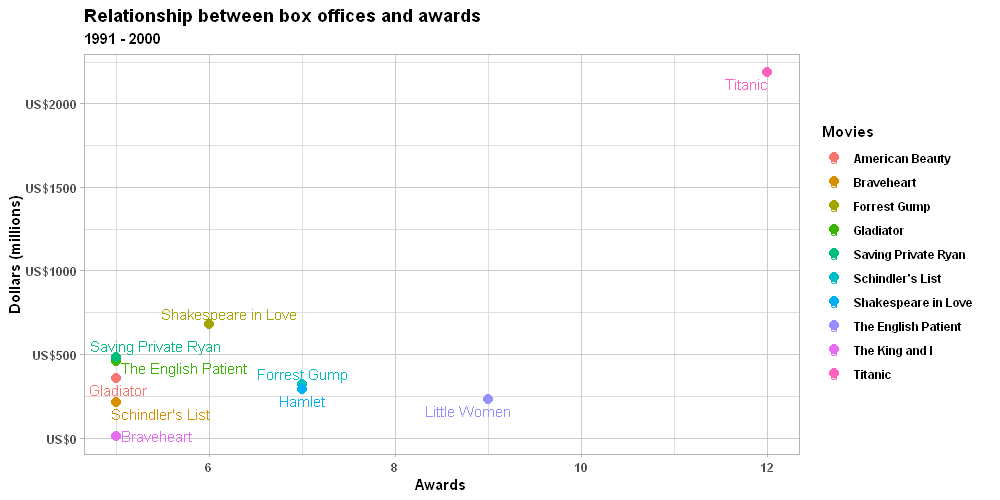

In [33]:
boxoffice_oscar(1991,2000,10)

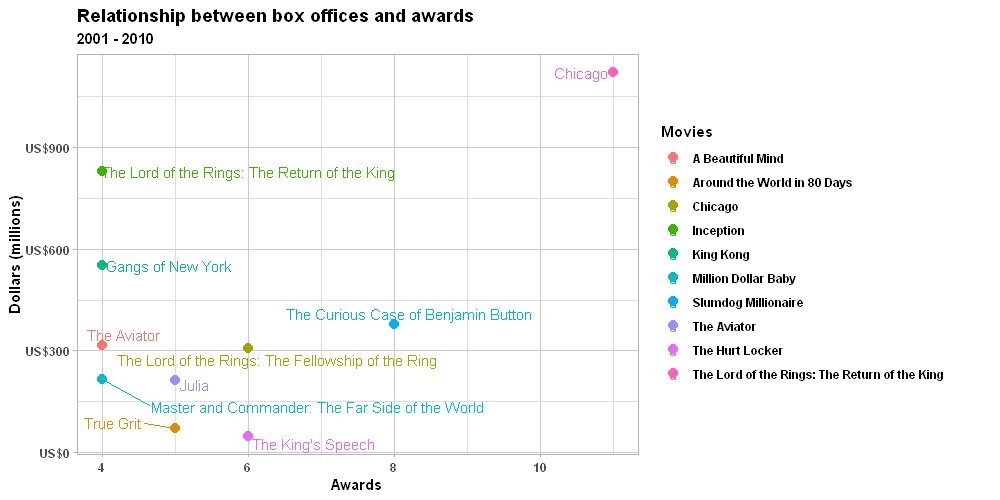

In [34]:
boxoffice_oscar(2001,2010,10)

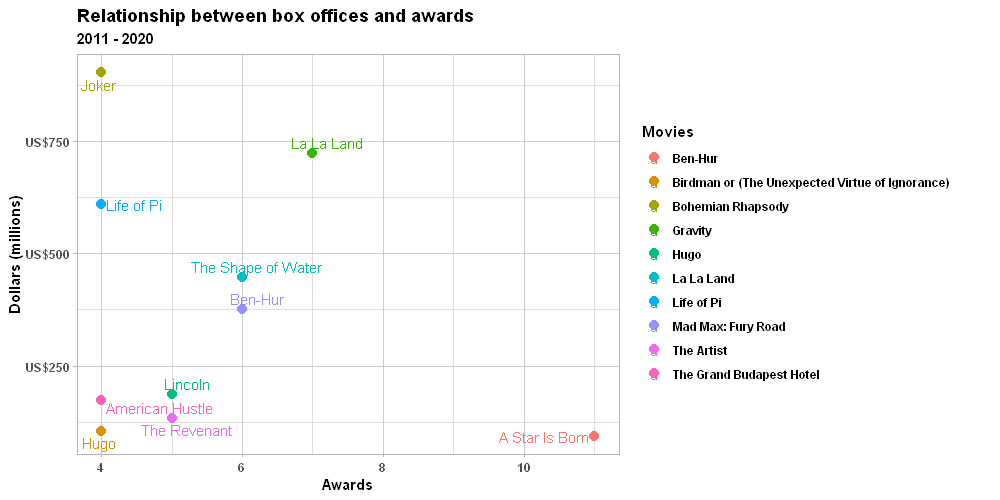

In [35]:
boxoffice_oscar(2011,2020,10)

# Genres with the most awards over the years

In [36]:
#Function to plotting
genres_awards <- function(start, end, top){ #(year, year, top classification)
    na.omit(oscar_award) %>%
        inner_join(imdb_movies.omit, by = c('film'='title')) %>%
        filter(year %in% seq(start, end) & winner == TRUE) %>%
        group_by(genre) %>%
        summarise('awards' = n()) %>%
        arrange(-awards) %>%
        head(top) %>%
        ggplot(aes(x = reorder(genre, awards), y = awards, fill = genre)) +
        geom_bar(stat='identity') +
        scale_y_continuous(breaks = seq(0,50)) +
        labs(title = 'Genres with the most awards over the decades',
             subtitle = paste0(start, ' - ', end),
            x = 'Genres', y = 'Awards',
            fill='Genres') +
        coord_flip() +
        theme_perso_col()
}

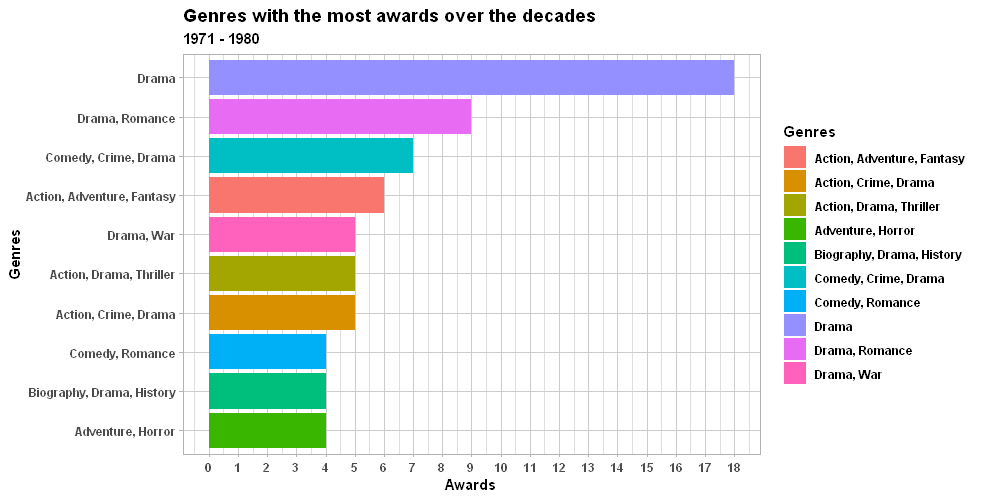

In [37]:
genres_awards(1971,1980,10)

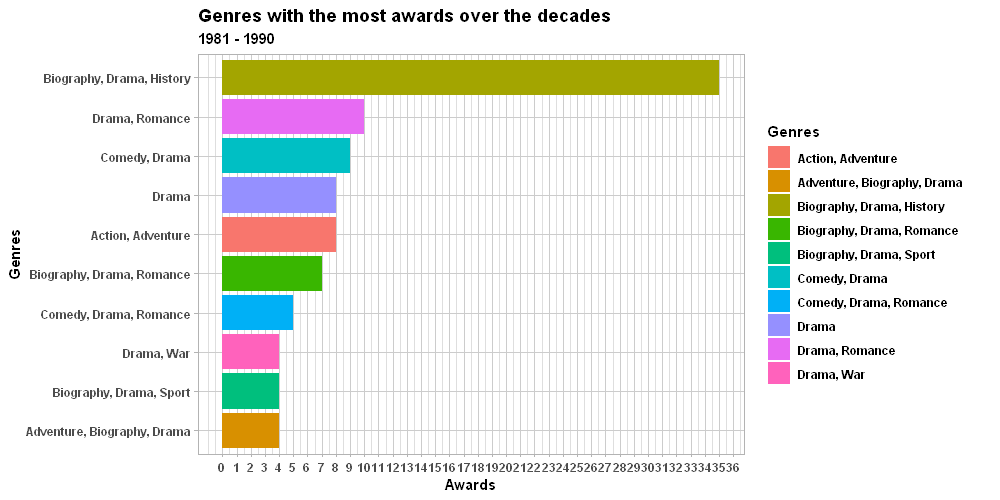

In [38]:
genres_awards(1981,1990,10)

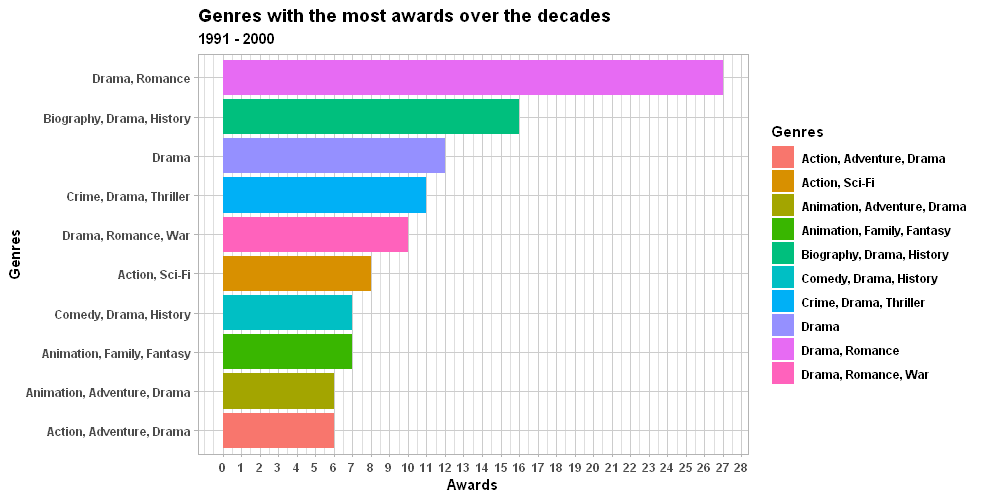

In [39]:
genres_awards(1991,2000,10)

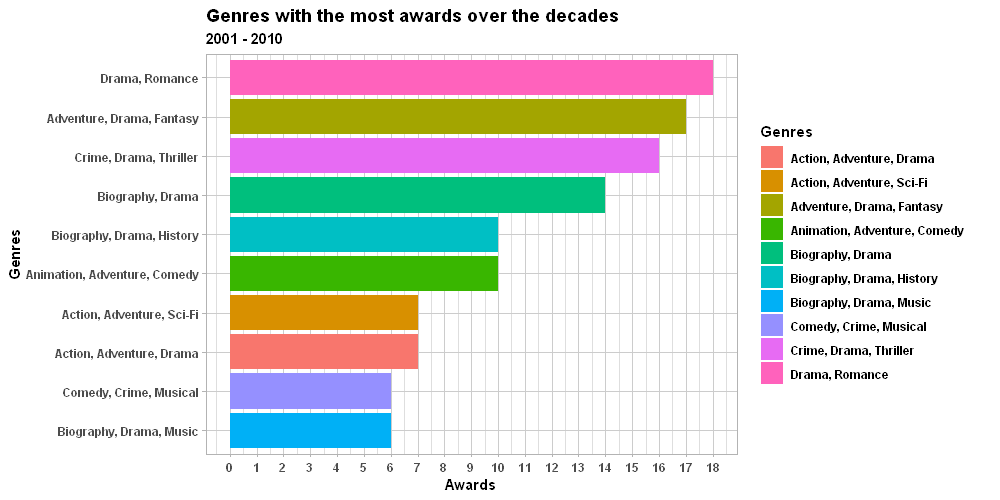

In [40]:
genres_awards(2001,2010,10)

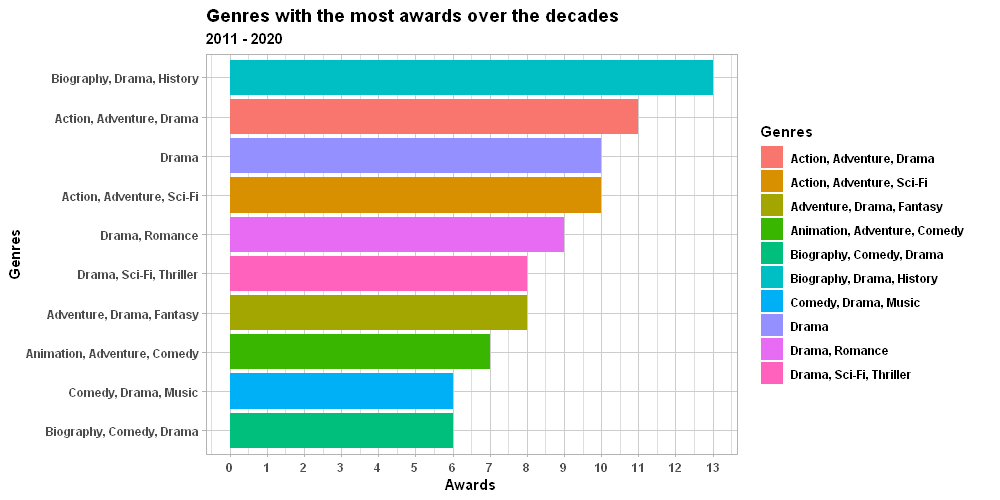

In [41]:
genres_awards(2011,2020,10)

# Martin Scorsese

Well, my favorite movie director is Martin Scorsese, so I've been deciced to show some things about him.

In [42]:
imdb_movies %>%
        select(title, director, avg_vote) %>%
        filter(director %in% 'Martin Scorsese') %>%
        arrange(-avg_vote)

title,director,avg_vote
Goodfellas,Martin Scorsese,8.7
The Irishman,Martin Scorsese,8.7
The Departed,Martin Scorsese,8.5
Taxi Driver,Martin Scorsese,8.3
Raging Bull,Martin Scorsese,8.2
Casino,Martin Scorsese,8.2
The Wolf of Wall Street,Martin Scorsese,8.2
Shutter Island,Martin Scorsese,8.1
The King of Comedy,Martin Scorsese,7.8
After Hours,Martin Scorsese,7.7


In [43]:
#Average of Martin Scorsese's movies
imdb_movies %>%
        filter(director %in% 'Martin Scorsese') %>%
        group_by(director) %>%
        summarise('mean_imdb_score' = mean(avg_vote))

director,mean_imdb_score
Martin Scorsese,7.556


In [44]:
#Quantity of indications to Oscar
oscar_award %>%
        filter(name %in% 'Martin Scorsese')

year_film,year_ceremony,ceremony,category,name,film,winner
1980,1981,53,DIRECTING,Martin Scorsese,Raging Bull,FALSE
1988,1989,61,DIRECTING,Martin Scorsese,The Last Temptation of Christ,FALSE
1990,1991,63,DIRECTING,Martin Scorsese,Good Fellas,FALSE
2002,2003,75,DIRECTING,Martin Scorsese,Gangs of New York,FALSE
2004,2005,77,DIRECTING,Martin Scorsese,The Aviator,FALSE
2006,2007,79,DIRECTING,Martin Scorsese,The Departed,TRUE
2011,2012,84,DIRECTING,Martin Scorsese,Hugo,FALSE
2013,2014,86,DIRECTING,Martin Scorsese,The Wolf of Wall Street,FALSE
2019,2020,92,DIRECTING,Martin Scorsese,The Irishman,FALSE
